# Part I - Propser Loan Dataset Exploration
## by Moyinoluwa Sobowale

## Introduction
> This notebook explores a Prosper loan dataset containing information of 113,937 loans with 81 variables(columns) on each loan. [Find column details here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0). 

Dataset provided by: Udacity.




## Preliminary Wrangling


> Import all the required python libraries and packages for this project

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#Read the downloaded file (prosperLoanData.csv data) into a pandas dataframe called loan_data
loan_data = pd.read_csv("/Users/mac/Downloads/MOYIN/Moe/UDACITY - DATA ANALYST NANODEGREE/PROJECT 3/prosperLoanData.csv")

> View the loan_data dataframe (prosperLoanData.csv data)

In [3]:
#visually assess the loan_data pandas dataframe
loan_data

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


> **[Column Names (characteristics) and their Significance](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)**

ListingKey: Unique key for each listing, same value as the 'key' used in the listing object in the API.

ListingNumber: The number that uniquely identifies the listing to the public as displayed on the website.

ListingCreationDate: The date the listing was created.

CreditGrade: The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.

Term: The length of the loan expressed in months.

LoanStatus: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

ClosedDate: Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses.

BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.

BorrowerRate: The Borrower's interest rate for this loan. 

LenderYield: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.

EstimatedEffectiveYield	Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009.

EstimatedLoss: Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.

EstimatedReturn: The estimated return assigned to the listing at the time it was created. Estimated return is the difference between the Estimated Effective Yield and the Estimated Loss Rate. Applicable for loans originated after July 2009.

ProsperRating (numeric): The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 - AA.  Applicable for loans originated after July 2009.

ProsperRating (Alpha): The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.

ProsperScore: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.

ListingCategory: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

Occupation: The Occupation selected by the Borrower at the time they created the listing.

EmploymentStatus: The employment status of the borrower at the time they posted the listing.

EmploymentStatusDuration: The length in months of the employment status at the time the listing was created.

IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

CurrentlyInGroup: Specifies whether or not the Borrower was in a group at the time the listing was created.

GroupKey: The Key of the group in which the Borrower is a member of. Value will be null if the borrower does not have a group affiliation.

DateCreditPulled: The date the credit profile was pulled.

CreditScoreRangeLower: The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.

CreditScoreRangeUpper: The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 

FirstRecordedCreditLine: The date the first credit line was opened.

CurrentCreditLines: Number of current credit lines at the time the credit profile was pulled.

OpenCreditLines: Number of open credit lines at the time the credit profile was pulled.

TotalCreditLinespast7years: Number of credit lines in the past seven years at the time the credit profile was pulled.

OpenRevolvingAccounts: Number of open revolving accounts at the time the credit profile was pulled.

OpenRevolvingMonthlyPayment: Monthly payment on revolving accounts at the time the credit profile was pulled.

InquiriesLast6Months: Number of inquiries in the past six months at the time the credit profile was pulled.

TotalInquiries: Total number of inquiries at the time the credit profile was pulled.

CurrentDelinquencies: Number of accounts delinquent at the time the credit profile was pulled.

AmountDelinquent: Dollars delinquent at the time the credit profile was pulled.

DelinquenciesLast7Years: Number of delinquencies in the past 7 years at the time the credit profile was pulled.

PublicRecordsLast10Years: Number of public records in the past 10 years at the time the credit profile was pulled.

PublicRecordsLast12Months: Number of public records in the past 12 months at the time the credit profile was pulled.

RevolvingCreditBalance: Dollars of revolving credit at the time the credit profile was pulled.

BankcardUtilization: The percentage of available revolving credit that is utilized at the time the credit profile was pulled.

AvailableBankcardCredit: The total available credit via bank card at the time the credit profile was pulled.

TotalTrades: Number of trade lines ever opened at the time the credit profile was pulled.

TradesNeverDelinquent: Number of trades that have never been delinquent at the time the credit profile was pulled.

TradesOpenedLast6Months: Number of trades opened in the last 6 months at the time the credit profile was pulled.

DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

IncomeRange: The income range of the borrower at the time the listing was created.

IncomeVerifiable: The borrower indicated they have the required documentation to support their income.

StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.

LoanKey: Unique key for each loan. This is the same key that is used in the API.

TotalProsperLoans: Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans.

TotalProsperPaymentsBilled: Number of on time payments the borrower made on Prosper loans at the time they created this listing. This value will be null if the borrower had no prior loans.

OnTimeProsperPayments: Number of on time payments the borrower had made on Prosper loans at the time they created this listing. This value will be null if the borrower has no prior loans.

ProsperPaymentsLessThanOneMonthLate: Number of payments the borrower made on Prosper loans that were less than one month late at the time they created this listing. This value will be null if the borrower had no prior loans.

ProsperPaymentsOneMonthPlusLate: Number of payments the borrower made on Prosper loans that were greater than one month late at the time they created this listing. This value will be null if the borrower had no prior loans.

ProsperPrincipalBorrowed: Total principal borrowed on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.

ProsperPrincipalOutstanding: Principal outstanding on Prosper loans at the time the listing was created. This value will be null if the borrower had no prior loans.

ScorexChangeAtTimeOfListing: Borrower's credit score change at the time the credit profile was pulled. This will be the change relative to the borrower's last Prosper loan. This value will be null if the borrower had no prior loans.

LoanCurrentDaysDelinquent: The number of days delinquent. 

LoanFirstDefaultedCycleNumber: The cycle the loan was charged off. If the loan has not charged off the value will be null. 
LoanMonthsSinceOrigination	Number of months since the loan originated.

LoanNumber: Unique numeric value associated with the loan.

LoanOriginalAmount: The origination amount of the loan.

LoanOriginationDate: The date the loan was originated.

LoanOriginationQuarter: The quarter in which the loan was originated.

MemberKey: The unique key that is associated with the borrower. This is the same identifier that is used in the API member object. 

MonthlyLoanPayment: The scheduled monthly loan payment.

LP_CustomerPayments: Pre charge-off cumulative gross payments made by the borrower on the loan. If the loan has charged off, this value will exclude any recoveries.

LP_CustomerPrincipalPayments: Pre charge-off cumulative principal payments made by the borrower on the loan. If the loan has charged off, this value will exclude any recoveries.

LP_InterestandFees: Pre charge-off cumulative interest and fees paid by the borrower. If the loan has charged off, this value will exclude any recoveries.

LP_ServiceFees: Cumulative service fees paid by the investors who have invested in the loan. 

LP_CollectionFees: Cumulative collection fees paid by the investors who have invested in the loan.

LP_GrossPrincipalLoss: The gross charged off amount of the loan.

LP_NetPrincipalLoss: The principal that remains uncollected after any recoveries.

LP_NonPrincipalRecoverypayments: The interest and fee component of any recovery payments. The current payment policy applies payments in the following order: Fees, interest, principal.

PercentFunded: Percent the listing was funded.

Recommendations: Number of recommendations the borrower had at the time the listing was created.

InvestmentFromFriendsCount: Number of friends that made an investment in the loan.

InvestmentFromFriendsAmount: Dollar amount of investments that were made by friends.

Investors: The number of investors that funded the loan.

In [4]:
#Get the number of rows and columns in loan_data dataframe
loan_data.shape

(113937, 81)

In [5]:
#View a concise summary of the loan_data dataframe including the number of non-null values in each column
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
#Get useful descriptive statistics for each column of the loan_data dataframe
loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> The propser loan dataset contains 113937 loans with 81 variables (columns) on each loan.

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in the prosper loan dataset are the ones giving insight into the borrower and their loan cycle (from origination till complete repayment).

>**Features related to the Borrower**
>1. BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
>2. BorrowerRate: The Borrower's interest rate for this loan.

>**Features related to the Loan disbursed to the borrower**
>1. LoanOriginalAmount: The origination amount of the loan.
>2. LoanOriginationDate: The date the loan was originated.
>3. Term: The length of the loan expressed in months.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The following important features will support my investigation in the propser loans dataset

**Borrower's features**
1. ListingCategory (numeric): The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

2. BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.

3. Occupation: The Occupation selected by the Borrower at the time they created the listing.

4. EmploymentStatus: The employment status of the borrower at the time they posted the listing.

5. IsBorrowerHomeowner: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

6. IncomeRange: The income range of the borrower at the time the listing was created.

7. IncomeVerifiable: The borrower indicated they have the required documentation to support their income.

8. StatedMonthlyIncome: The monthly income the borrower stated at the time the listing was created.

9. DebtToIncomeRatio: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

10. BorrowerState: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.



**Features related to the Loan disbursed to the borrower**

1. LoanNumber: Unique numeric value associated with the loan.

3. LoanOriginationQuarter: The quarter in which the loan was originated.

4. LoanStatus: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

5. ClosedDate: Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses. 

6. TotalProsperLoans: Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans.



## Data Wrangling

In [7]:
#create a dataframe containing the colomns of interest in the loan_data
columns = ['BorrowerAPR','BorrowerRate','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','IsBorrowerHomeowner','IncomeRange','IncomeVerifiable','StatedMonthlyIncome','DebtToIncomeRatio','LoanNumber','LoanOriginalAmount','LoanOriginationDate','LoanOriginationQuarter','Term','LoanStatus','ClosedDate','TotalProsperLoans']
new_loan = loan_data[columns]

In [8]:
#view the first five rows of the new_loan dataframe
new_loan.head()

,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,DebtToIncomeRatio,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,Term,LoanStatus,ClosedDate,TotalProsperLoans
0,0.16516,0.1580,0,CO,Other,Self-employed,True,"$25,000-49,999",True,3083.333333,0.17,19141,9425,2007-09-12 00:00:00,Q3 2007,36,Completed,2009-08-14 00:00:00,NaN
1,0.12016,0.0920,2,CO,Professional,Employed,False,"$50,000-74,999",True,6125.000000,0.18,134815,10000,2014-03-03 00:00:00,Q1 2014,36,Current,NaN,NaN
2,0.28269,0.2750,0,GA,Other,Not available,False,Not displayed,True,2083.333333,0.06,6466,3001,2007-01-17 00:00:00,Q1 2007,36,Completed,2009-12-17 00:00:00,NaN
3,0.12528,0.0974,16,GA,Skilled Labor,Employed,True,"$25,000-49,999",True,2875.000000,0.15,77296,10000,2012-11-01 00:00:00,Q4 2012,36,Current,NaN,NaN
4,0.24614,0.2085,2,MN,Executive,Employed,True,"$100,000+",True,9583.333333,0.26,102670,15000,2013-09-20 00:00:00,Q3 2013,36,Current,NaN,1.0


In [9]:
#make a copy of the new_loan df
loan = new_loan.copy()

In [10]:
#View a concise summary of the loan dataframe including the number of non-null values in each column
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   BorrowerAPR                113912 non-null  float64
 1   BorrowerRate               113937 non-null  float64
 2   ListingCategory (numeric)  113937 non-null  int64  
 3   BorrowerState              108422 non-null  object 
 4   Occupation                 110349 non-null  object 
 5   EmploymentStatus           111682 non-null  object 
 6   IsBorrowerHomeowner        113937 non-null  bool   
 7   IncomeRange                113937 non-null  object 
 8   IncomeVerifiable           113937 non-null  bool   
 9   StatedMonthlyIncome        113937 non-null  float64
 10  DebtToIncomeRatio          105383 non-null  float64
 11  LoanNumber                 113937 non-null  int64  
 12  LoanOriginalAmount         113937 non-null  int64  
 13  LoanOriginationDate        11

In [11]:
#Get useful descriptive statistics for each column of the loan dataframe
loan.describe()

,BorrowerAPR,BorrowerRate,ListingCategory (numeric),StatedMonthlyIncome,DebtToIncomeRatio,LoanNumber,LoanOriginalAmount,Term,TotalProsperLoans
count,113912.000000,113937.000000,113937.000000,1.139370e+05,105383.000000,113937.000000,113937.00000,113937.000000,22085.000000
mean,0.218828,0.192764,2.774209,5.608026e+03,0.275947,69444.474271,8337.01385,40.830248,1.421100
std,0.080364,0.074818,3.996797,7.478497e+03,0.551759,38930.479610,6245.80058,10.436212,0.764042
min,0.006530,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1000.00000,12.000000,0.000000
25%,0.156290,0.134000,1.000000,3.200333e+03,0.140000,37332.000000,4000.00000,36.000000,1.000000
50%,0.209760,0.184000,1.000000,4.666667e+03,0.220000,68599.000000,6500.00000,36.000000,1.000000
75%,0.283810,0.250000,3.000000,6.825000e+03,0.320000,101901.000000,12000.00000,36.000000,2.000000
max,0.512290,0.497500,20.000000,1.750003e+06,10.010000,136486.000000,35000.00000,60.000000,8.000000


In [12]:
# check for null values form the data set
loan.isnull().sum()

BorrowerAPR                     25
BorrowerRate                     0
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
IsBorrowerHomeowner              0
IncomeRange                      0
IncomeVerifiable                 0
StatedMonthlyIncome              0
DebtToIncomeRatio             8554
LoanNumber                       0
LoanOriginalAmount               0
LoanOriginationDate              0
LoanOriginationQuarter           0
Term                             0
LoanStatus                       0
ClosedDate                   58848
TotalProsperLoans            91852
dtype: int64

**Convert 'LoanOriginationDate' and 'ClosedDate'from string datatype to datetime format**

In [13]:
#Convert from string datatype to datetime format 
loan['LoanOriginationDate']= pd.to_datetime(loan['LoanOriginationDate'])
loan['ClosedDate']= pd.to_datetime(loan['ClosedDate'])

**Split the 'LoanOriginationDate' & 'ClosedDate' columns into month and year respectively**

In [14]:
#create month and year columns from LoanOriginationDate & ClosedDate
loan['Loan_Month']= pd.DatetimeIndex(loan['LoanOriginationDate']).month
loan['Loan_Year']= pd.DatetimeIndex(loan['LoanOriginationDate']).year
loan['Closed_Month']= pd.DatetimeIndex(loan['ClosedDate']).month
loan['Closed_Year']= pd.DatetimeIndex(loan['ClosedDate']).year

**Convert 'Term', 'Loan_Month', 'Loan_Year', 'Closed_Month', 'Closed_Year' from datetime format to object datatype**

In [15]:
#change Term, Loan_Month, Loan_Year, Closed_Month, Closed_Year to object datatype
loan['Term']=loan['Term'].astype(object)
loan['Loan_Month']= loan['Loan_Month'].astype(object)
loan['Loan_Year']= loan['Loan_Year'].astype(object)
loan['Closed_Month']= loan['Closed_Month'].astype(object)
loan['Closed_Year']= loan['Closed_Year'].astype(object)

**Convert 'LoanNumber' from numerical datatype (integer) to string datatype**

In [16]:
#Convert from numerical datatype to string/object format
loan = loan.astype({"LoanNumber": str})

In [17]:
#View a concise summary of the loan dataframe including the number of non-null values in each column
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   BorrowerAPR                113912 non-null  float64       
 1   BorrowerRate               113937 non-null  float64       
 2   ListingCategory (numeric)  113937 non-null  int64         
 3   BorrowerState              108422 non-null  object        
 4   Occupation                 110349 non-null  object        
 5   EmploymentStatus           111682 non-null  object        
 6   IsBorrowerHomeowner        113937 non-null  bool          
 7   IncomeRange                113937 non-null  object        
 8   IncomeVerifiable           113937 non-null  bool          
 9   StatedMonthlyIncome        113937 non-null  float64       
 10  DebtToIncomeRatio          105383 non-null  float64       
 11  LoanNumber                 113937 non-null  object  

In [18]:
#View the unique entries in the BorrowerState column (loan dataframe)
loan['BorrowerState'].value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

**From the above, we can see that all the entries in 'BorrowerState' column are the two letter abbreviation of the state of the address of the borrower in the United States of America at the time the Listing was created.
We will go ahead to replace these two letter abbrevations with their actual state names.** [Resource from wikipedia](https://simple.wikipedia.org/wiki/List_of_U.S._states_by_traditional_abbreviation)

In [19]:
# create an empty list called 'borrower_state'
borrower_state = []
# create a loop which will iterate over all the rows in the column 'BorrowerState' and assign values in the list if the condition below is met
for x in loan['BorrowerState']:
    if x == 'CA': borrower_state.append('California')
    if x == 'TX': borrower_state.append('Texas')
    if x == 'NY': borrower_state.append('New York')
    if x == 'FL': borrower_state.append('Florida')
    if x == 'IL': borrower_state.append('Illinois')
    if x == 'GA': borrower_state.append('Georgia')
    if x == 'OH': borrower_state.append('Ohio')
    if x == 'MI': borrower_state.append('Michigan')
    if x == 'VA': borrower_state.append('Virginia')
    if x == 'NJ': borrower_state.append('New Jersey')
    if x == 'NC': borrower_state.append('North Carolina')
    if x == 'WA': borrower_state.append('Washington')
    if x == 'PA': borrower_state.append('Pennsylvania')
    if x == 'MD': borrower_state.append('Maryland')
    if x == 'MO': borrower_state.append('Missouri')
    if x == 'MN': borrower_state.append('Minnesota')
    if x == 'MA': borrower_state.append('Massachusetts')
    if x == 'CO': borrower_state.append('Colorado')
    if x == 'IN': borrower_state.append('Indiana')
    if x == 'AZ': borrower_state.append('Arizona')
    if x == 'WI': borrower_state.append('Wisconsin')
    if x == 'OR': borrower_state.append('Oregon')
    if x == 'TN': borrower_state.append('Tennessee')
    if x == 'AL': borrower_state.append('Alabama')
    if x == 'CT': borrower_state.append('Connecticut')
    if x == 'SC': borrower_state.append('South Carolina')
    if x == 'NV': borrower_state.append('Nevada')
    if x == 'KS': borrower_state.append('Kansas')
    if x == 'KY': borrower_state.append('Kentucky')
    if x == 'OK': borrower_state.append('Oklahoma')
    if x == 'LA': borrower_state.append('Louisiana')
    if x == 'UT': borrower_state.append('Utah')
    if x == 'AR': borrower_state.append('Arkansas')
    if x == 'MS': borrower_state.append('Mississippi')
    if x == 'NE': borrower_state.append('Nebraska')
    if x == 'ID': borrower_state.append('Idaho')
    if x == 'NH': borrower_state.append('New Hampshire')
    if x == 'NM': borrower_state.append('New Mexico')
    if x == 'RI': borrower_state.append('Rhode Island')
    if x == 'HI': borrower_state.append('Hawaii')
    if x == 'WV': borrower_state.append('West Virginia')
    if x == 'DC': borrower_state.append('District of Columbia')
    if x == 'MT': borrower_state.append('Montana')
    if x == 'DE': borrower_state.append('Delaware')
    if x == 'VT': borrower_state.append('Vermont')
    if x == 'AK': borrower_state.append('Alaska')
    if x == 'SD': borrower_state.append('South Dakota')
    if x == 'IA': borrower_state.append('Iowa')
    if x == 'WY': borrower_state.append('Wyomig')
    if x == 'ME': borrower_state.append('Maine')
    if x == 'ND': borrower_state.append('North Dakota')

#store the appended values in the 'borrower_state' pandas series into a new column called 'borrower_state' in the loan data frame  
                                
loan['borrower_state']= pd.Series(borrower_state)

In [20]:
#Confirm if the actaul state names are present in the new 'borrower_state' column (loan dataframe)
loan['borrower_state'].value_counts()

California              14717
Texas                    6842
New York                 6729
Florida                  6720
Illinois                 5921
Georgia                  5008
Ohio                     4197
Michigan                 3593
Virginia                 3278
New Jersey               3097
North Carolina           3084
Washington               3048
Pennsylvania             2972
Maryland                 2821
Missouri                 2615
Minnesota                2318
Massachusetts            2242
Colorado                 2210
Indiana                  2078
Arizona                  1901
Wisconsin                1842
Oregon                   1817
Tennessee                1737
Alabama                  1679
Connecticut              1627
South Carolina           1122
Nevada                   1090
Kansas                   1062
Kentucky                  983
Oklahoma                  971
Louisiana                 954
Utah                      877
Arkansas                  855
Mississipp

In [21]:
#Rename the 'ListingCategory (numeric)' column to 'ListingCategory'
loan=loan.rename(columns={"ListingCategory (numeric)":"ListingCategory"})

**From the datatset dictionary, we can see that the listening category is being represented by numbers**:

0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans.

**However for the purpose of our analysis, we will go ahead to replace each number representation with the actual listing category name**

In [22]:
# create an empty list called 'listing_category'
listing_category = []
# creat a loop which will iterate over all the rows in the 'ListingCategory' column and assign values in the list if the condition below is met
for x in loan['ListingCategory']:
    if x == 0: listing_category.append('Not available')
    if x == 1: listing_category.append('Debt Consolidation')
    if x == 2: listing_category.append('Home Improvement')
    if x == 3: listing_category.append('Business')
    if x == 4: listing_category.append('Personal Loan')
    if x == 5: listing_category.append('Student Use')
    if x == 6: listing_category.append('Auto')
    if x == 7: listing_category.append('Other')
    if x == 8: listing_category.append('Baby & Adoption')
    if x == 9: listing_category.append('Boat')
    if x == 10: listing_category.append('Cosmetic Procedure')
    if x == 11: listing_category.append('Engagement Ring')
    if x == 12: listing_category.append('Green Loans')
    if x == 13: listing_category.append('Household Expenses')
    if x == 14: listing_category.append('Large Purchases')
    if x == 15: listing_category.append('Medical/Dental')
    if x == 16: listing_category.append('Motorcycle')
    if x == 17: listing_category.append('RV')
    if x == 18: listing_category.append('Taxes')
    if x == 19: listing_category.append('Vacation')
    if x == 20: listing_category.append('Wedding Loans')
    
#store the append values in the 'listing_category' list into a new column called 'listing_category' in the loan data frame  
                                
loan['listing_category']= listing_category

In [23]:
#Confirm if the actaul listing_category names are now present in the new 'listing_category' column (loan dataframe)
loan['listing_category'].value_counts()

Debt Consolidation    58308
Not available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby & Adoption         199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: listing_category, dtype: int64

In [24]:
#We can now proceed to drop both the former 'ListingCategory' and 'BorrowerState' columns
loan=loan.drop('ListingCategory',axis=1)
loan=loan.drop('BorrowerState',axis=1)

In [25]:
#View a concise summary of the loan dataframe including the number of non-null values in each column
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   BorrowerAPR             113912 non-null  float64       
 1   BorrowerRate            113937 non-null  float64       
 2   Occupation              110349 non-null  object        
 3   EmploymentStatus        111682 non-null  object        
 4   IsBorrowerHomeowner     113937 non-null  bool          
 5   IncomeRange             113937 non-null  object        
 6   IncomeVerifiable        113937 non-null  bool          
 7   StatedMonthlyIncome     113937 non-null  float64       
 8   DebtToIncomeRatio       105383 non-null  float64       
 9   LoanNumber              113937 non-null  object        
 10  LoanOriginalAmount      113937 non-null  int64         
 11  LoanOriginationDate     113937 non-null  datetime64[ns]
 12  LoanOriginationQuarter  113937

In [26]:
#Get useful descriptive statistics for each column of the loan dataframe
loan.describe()

,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,DebtToIncomeRatio,LoanOriginalAmount,TotalProsperLoans
count,113912.000000,113937.000000,1.139370e+05,105383.000000,113937.00000,22085.000000
mean,0.218828,0.192764,5.608026e+03,0.275947,8337.01385,1.421100
std,0.080364,0.074818,7.478497e+03,0.551759,6245.80058,0.764042
min,0.006530,0.000000,0.000000e+00,0.000000,1000.00000,0.000000
25%,0.156290,0.134000,3.200333e+03,0.140000,4000.00000,1.000000
50%,0.209760,0.184000,4.666667e+03,0.220000,6500.00000,1.000000
75%,0.283810,0.250000,6.825000e+03,0.320000,12000.00000,2.000000
max,0.512290,0.497500,1.750003e+06,10.010000,35000.00000,8.000000


## Univariate Exploration

**Q1: What is the distribution of the loan listing category?**

**Define**: Use the .value_counts() method to get the numerical distribution of the entries, then proceed to create a countplot (barchart) showing the distribution of the loan listing category

In [27]:
loan.listing_category.value_counts()

Debt Consolidation    58308
Not available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby & Adoption         199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: listing_category, dtype: int64

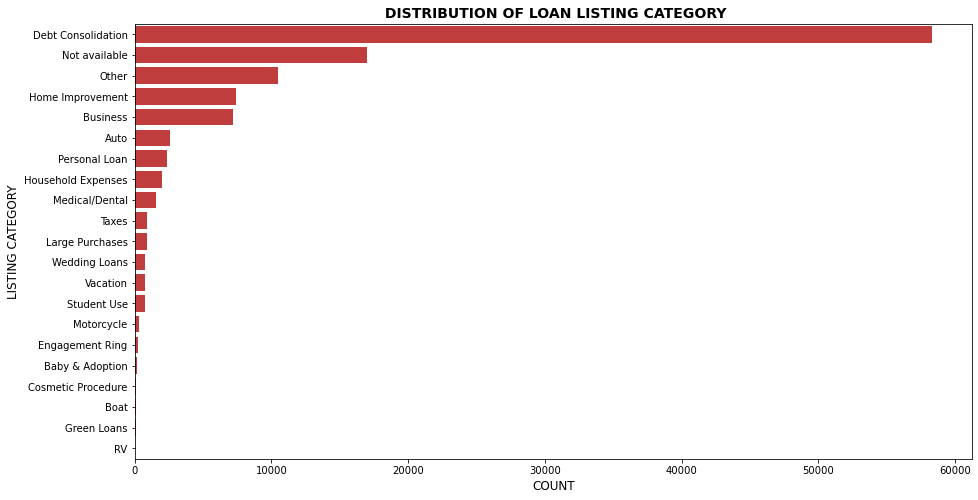

In [28]:
#Create a countplot to showing the distribution of the loan listing category
plt.figure(figsize = [15, 8])
color = sb.color_palette()[3]
order = loan.listing_category.value_counts().index
sb.countplot(data = loan, y = 'listing_category', color = color, order = order)
plt.title(" DISTRIBUTION OF LOAN LISTING CATEGORY", fontsize = 14, weight = ("bold"))
plt.xlabel("COUNT", fontsize = 12)
plt.ylabel("LISTING CATEGORY", fontsize = 12);

**Answer**: The countplot above shows us that majority of the borrowers, approximately 58308 request loans for debt consolidation

**Q2: What is the distribution of the borrower states?, What are the top 15 borrower states?**

**Define**: Use the .value_counts() method to get the numerical distribution of the entries, then proceed to create a countplot (barchart) showing the distribution of the borrower states.

In [29]:
loan['borrower_state'].value_counts()[:15]

California        14717
Texas              6842
New York           6729
Florida            6720
Illinois           5921
Georgia            5008
Ohio               4197
Michigan           3593
Virginia           3278
New Jersey         3097
North Carolina     3084
Washington         3048
Pennsylvania       2972
Maryland           2821
Missouri           2615
Name: borrower_state, dtype: int64

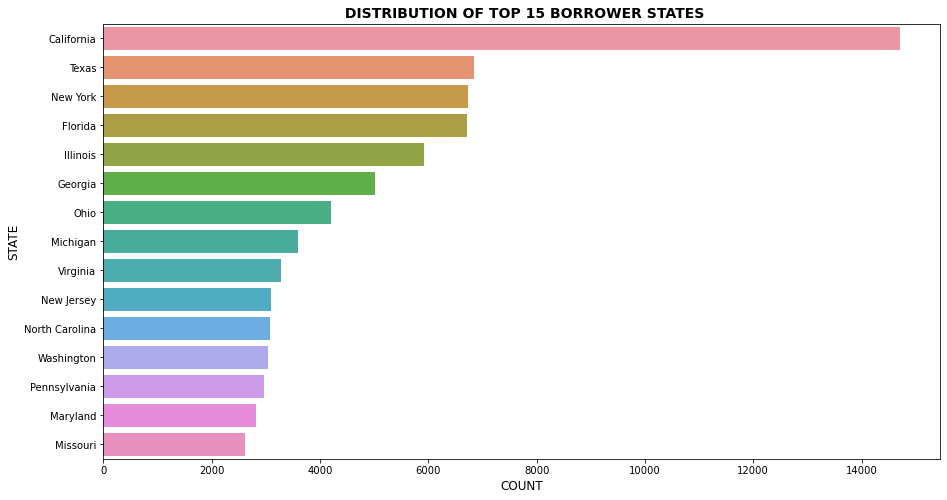

In [30]:
#create a countplot to show the distribution across the top 15 States in the USA 
plt.figure(figsize = [15, 8])
order = loan['borrower_state'].value_counts().iloc[:15].index
sb.countplot(data = loan, y = 'borrower_state', order = order)
plt.title(" DISTRIBUTION OF TOP 15 BORROWER STATES", fontsize = 14, weight = ("bold"))
plt.xlabel("COUNT", fontsize = 12)
plt.ylabel("BORROWER STATE", fontsize = 12);

**Answer**:Carlifonia is the state with the highest number of borrowers, they are approximately 14717.
The top 15 states are:

1. California
2. Texas
3. New York
4. Florida
5. Illinois
6. Georgia
7. Ohio
8. Michigan
9. Virginia
10. New Jersey
11. North Carolina
12. Washington
13. Pennsylvania
14. Maryland
15. Missouri

''

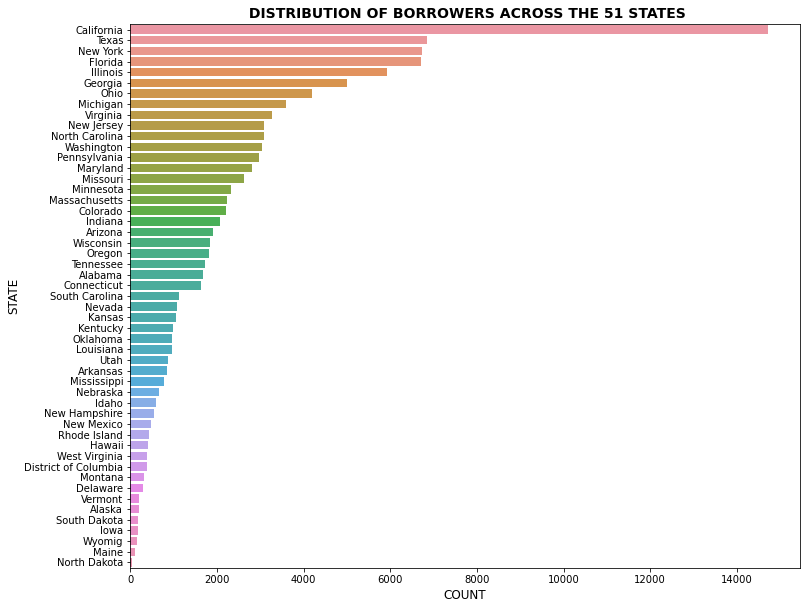

In [31]:
#create a countplot to show the distribution of the borrower States 
plt.figure(figsize = [12, 10])
order = loan['borrower_state'].value_counts().index
sb.countplot(data = loan, y = 'borrower_state', order = order)
plt.title(" DISTRIBUTION OF BORROWERS ACROSS THE 51 STATES", fontsize = 14, weight = ("bold"))
plt.xlabel("COUNT", fontsize = 12)
plt.ylabel("BORROWER STATE", fontsize = 12)
;

**Answer**:North Dakota is the state with the least number of borrowers. The least 5 states are:

1. South Dakota
2. Iowa
3. Wyoming
4. Maine
5. North Dakota

**Q3: What is the distribution of the Borrowers' Employment Status?**

**Define**: Use the .value_counts() method to get the numerical distribution of the entries, then proceed to create a countplot (barchart) showing the distribution of the borrowers' employment status.

In [32]:
loan['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

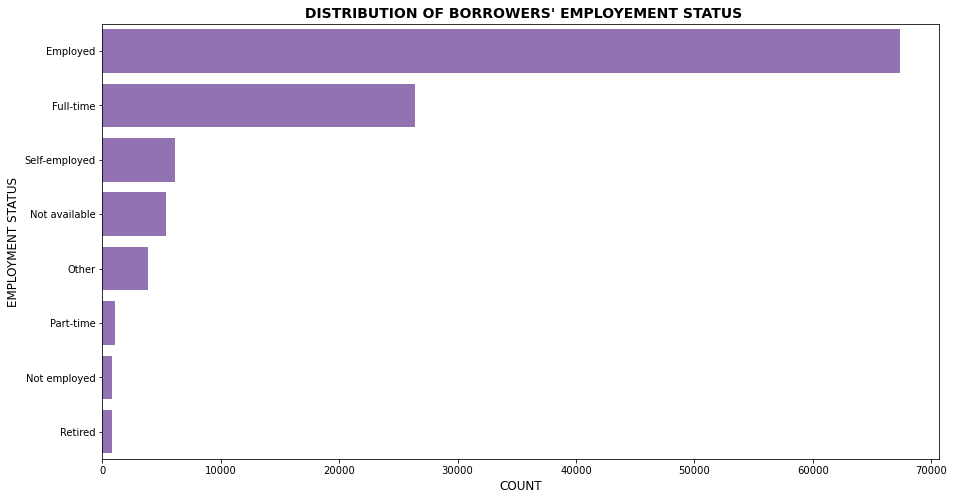

In [33]:
#create an horizontal countplot (barchart) to display the distribution of the borrowers' EmploymentStatus
plt.figure(figsize = [15, 8])
color = sb.color_palette()[4]
order = loan['EmploymentStatus'].value_counts().index
sb.countplot(data = loan, y = 'EmploymentStatus', color = color, order = order)
plt.title(" DISTRIBUTION OF BORROWERS' EMPLOYEMENT STATUS", fontsize = 14, weight = ("bold"))
plt.xlabel("COUNT", fontsize = 12)
plt.ylabel("EMPLOYMENT STATUS", fontsize = 12);

**Answer**: Majority of the borrowers are employed (67322), almost 70,000.

**Q4: What is the distribution of the borrowers' occupation?, What are the top 10 occupations?**

**Define**: Use the .value_counts() method to get the numerical distribution of the entries, then proceed to create a countplot (barchart) showing the distribution of the borrowers' occupations.

In [34]:
loan['Occupation'].value_counts()[:20]

Other                                28617
Professional                         13628
Computer Programmer                   4478
Executive                             4311
Teacher                               3759
Administrative Assistant              3688
Analyst                               3602
Sales - Commission                    3446
Accountant/CPA                        3233
Clerical                              3164
Sales - Retail                        2797
Skilled Labor                         2746
Retail Management                     2602
Nurse (RN)                            2489
Construction                          1790
Truck Driver                          1675
Laborer                               1595
Police Officer/Correction Officer     1578
Civil Service                         1457
Engineer - Mechanical                 1406
Name: Occupation, dtype: int64

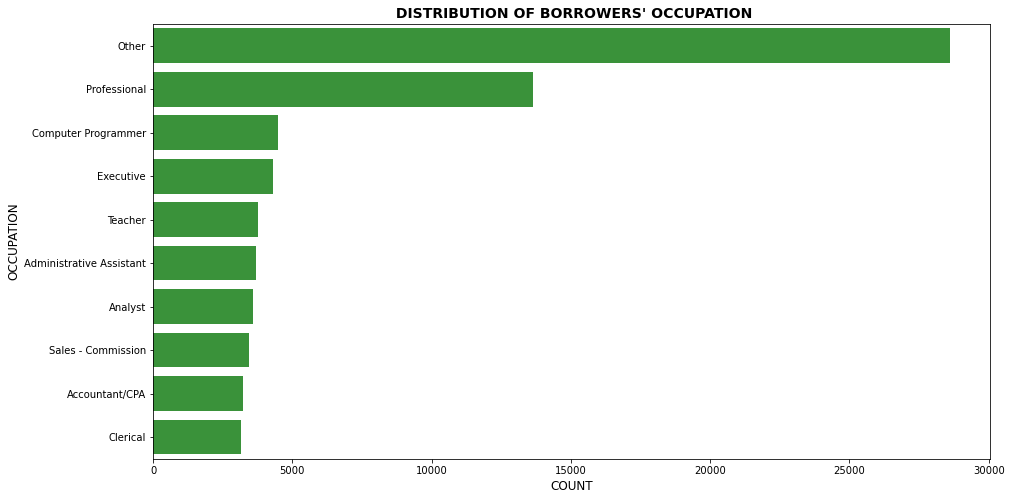

In [35]:
#create an horizontal countplot (barchart) to display the distribution of the borrowers' occupation.
#We can see the top 10 occupations from this plot
plt.figure(figsize = [15, 8])
color = sb.color_palette()[2]
order = loan['Occupation'].value_counts().iloc[:10].index
sb.countplot(data = loan, y = 'Occupation', color = color, order = order)
plt.title(" DISTRIBUTION OF BORROWERS' OCCUPATION", fontsize = 14, weight = ("bold"))
plt.xlabel("COUNT", fontsize = 12)
plt.ylabel("OCCUPATION", fontsize = 12);

**Answer**: Majority of the borrowers (almost 30,000) have other occupations asides the ones provided. Almost 15,000 borrowers are professionals.

**Q5: What is the distribution of the borrowers' income range?**

**Define**: Use the .value_counts() method to get the numerical distribution of the entries, then proceed to create a countplot (barchart) showing the distribution of the borrowers' Income range.

In [36]:
loan['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

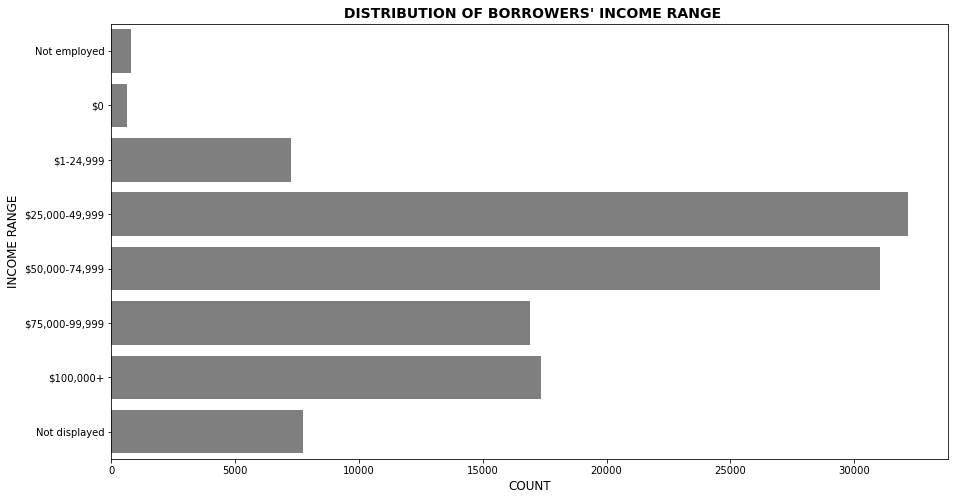

In [37]:
#create an horizontal countplot (barchart) to display the distribution of the borrowers' Income range
plt.figure(figsize = [15, 8])
color = sb.color_palette()[7]
order = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed']
sb.countplot(data= loan, y = 'IncomeRange', color = color, order = order)
plt.title(" DISTRIBUTION OF BORROWERS' INCOME RANGE", fontsize = 14, weight = ("bold"))
plt.xlabel("COUNT", fontsize = 12)
plt.ylabel("INCOME RANGE", fontsize = 12);

**Answer**: Majority of the borrowers are of the income range 25,000 - 74,999 dollars range

**Q6: What is the distribution of the loan term?**

**Define**: Use the .value_counts() method to get the numerical distribution of the entries, then proceed to create a countplot (barchart) showing the distribution of the loan term.

In [38]:
loan['Term'].value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

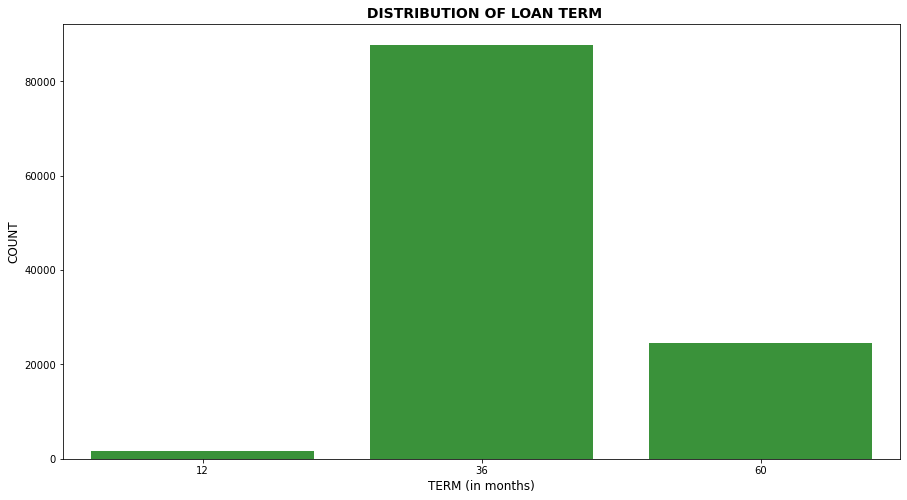

In [39]:
#create an countplot (barchart) to display the distribution of the loan term
plt.figure(figsize = [15, 8])
color = sb.color_palette()[2]
order = [12, 36, 60]
sb.countplot(data = loan, x = 'Term', color = color, order = order)
plt.title(" DISTRIBUTION OF LOAN TERM", fontsize = 14, weight = ("bold"))
plt.ylabel("COUNT", fontsize = 12)
plt.xlabel("TERM (in months)", fontsize = 12);

**Answer**: Majority of the loans have a duration of 36 months 

**Q7: What is the distribution of the loan months?**

**Define**: Use the .value_counts() method to get the numerical distribution of the entries, then proceed to create a countplot (barchart) showing the distribution of the loan months.

In [40]:
loan['Loan_Month'].value_counts()

1     11395
10    11043
12    10708
2      9728
11     9635
8      9592
9      9221
7      9154
6      8847
3      8555
5      8500
4      7559
Name: Loan_Month, dtype: int64

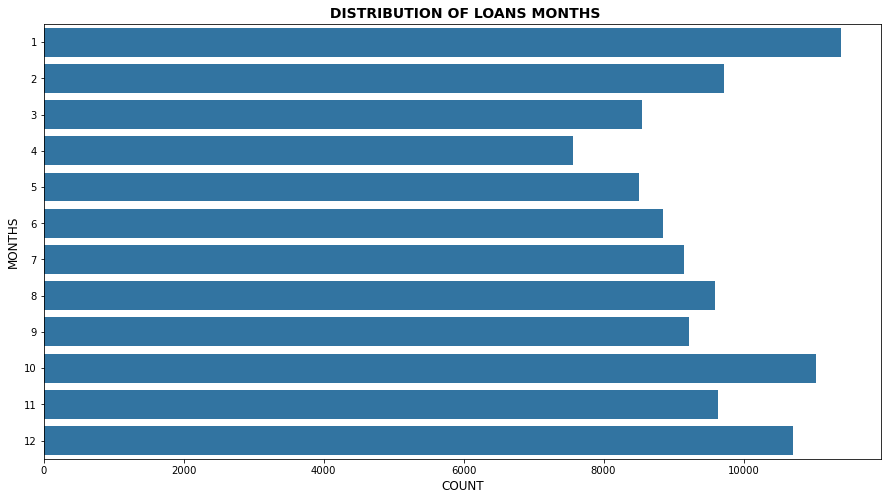

In [41]:
#create an horizontal countplot (barchart) to display the distribution of the loan months
plt.figure(figsize = [15, 8])
color = sb.color_palette()[0]
sb.countplot(data = loan, y = 'Loan_Month', color = color)
plt.title(" DISTRIBUTION OF LOANS MONTHS", fontsize = 14, weight = ("bold"))
plt.xlabel("COUNT", fontsize = 12)
plt.ylabel("MONTHS", fontsize = 12);

**Answer**: More Loans (Over 10,000) are taken in Janaury, October and December while April is the month with the least number of loans

**Q8: What is the distribution of the loan months?**

**Define**: Use the .value_counts() method to get the numerical distribution of the entries, then proceed to create a countplot (barchart) showing the distribution of the loan years.

In [42]:
loan['Loan_Year'].value_counts()

2013    34345
2012    19553
2014    12172
2008    11552
2007    11460
2011    11228
2006     5906
2010     5652
2009     2047
2005       22
Name: Loan_Year, dtype: int64

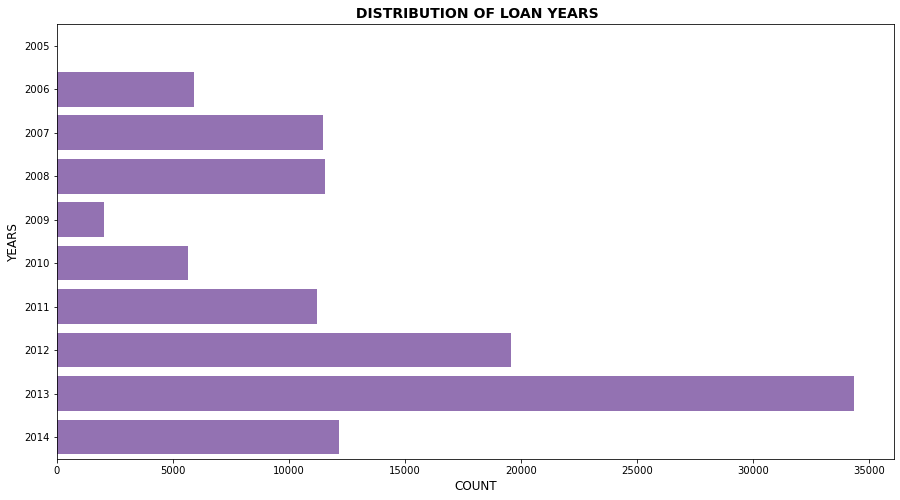

In [43]:
#create an horizontal countplot (barchart) to display the distribution of the loan years
plt.figure(figsize = [15, 8])
color = sb.color_palette()[4]
sb.countplot(data = loan, y = 'Loan_Year', color = color)
plt.title(" DISTRIBUTION OF LOAN YEARS", fontsize = 14, weight = ("bold"))
plt.xlabel("COUNT", fontsize = 12)
plt.ylabel("YEARS", fontsize = 12);

**Answers**: Majority of the loans were taken in 2013 (almost 35,000 loans), no loan was taken in 2005.

**Q9: What is the distribution of borrowers who are home owners**

**Define**: Use the .value_counts() method to get the numerical distribution of the entries, then proceed to create a doughnut chart showing the distribution of borrowers who are home owners.

In [44]:
x = loan['IsBorrowerHomeowner'].value_counts(normalize = True)
homeowner = x * 100
homeowner

True     50.447177
False    49.552823
Name: IsBorrowerHomeowner, dtype: float64

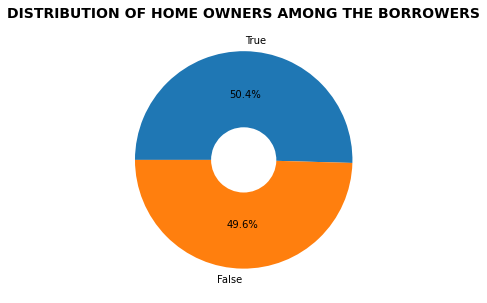

In [45]:
counts = homeowner
# set the fig size for the plot
plt.figure(figsize = [15, 5])
# plot the data on a doughnut chart
plt.pie(counts, labels = counts.index, autopct='%1.1f%%', startangle = 180,
        counterclock = False, wedgeprops = {'width' : 0.7})
plt.title("DISTRIBUTION OF HOME OWNERS AMONG THE BORROWERS", fontsize = 14, weight = ("bold"));

**Answers**: 50.4% of the borrowers are homeowners while 49.6% of the borrowers are not. The distribution chart shows an almost even distribution between borrowers who own a home and those who do not.
This implies that home ownership might not have a significant effect on getting a loan from Prosper.

**Q10: What is the distribution of total propser loans gotten by the borrowers?**

**Define**: Use the .value_counts() method to get the numerical distribution of the entries, then proceed to create a countplot showing the distribution of total propser loans gotten by the borrowers.

In [46]:
loan['TotalProsperLoans'].value_counts()

1.0    15538
2.0     4540
3.0     1447
4.0      417
5.0      104
6.0       29
7.0        8
8.0        1
0.0        1
Name: TotalProsperLoans, dtype: int64

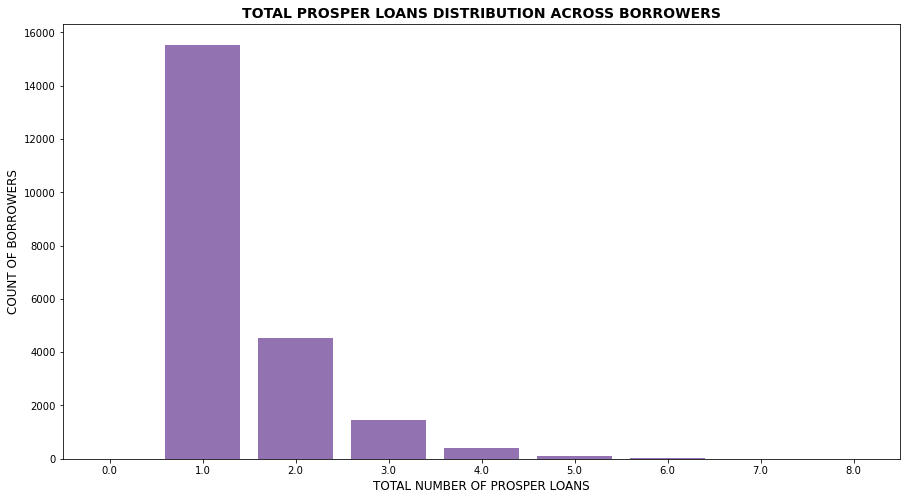

In [47]:
#create a countplot (barchart) to display the distribution of prosper loans among borrowers
plt.figure(figsize = [15, 8])
color = sb.color_palette()[4]
sb.countplot(data = loan, x = 'TotalProsperLoans', color = color);
plt.title('TOTAL PROSPER LOANS DISTRIBUTION ACROSS BORROWERS', fontsize=14, weight=("bold"))
plt.ylabel('COUNT OF BORROWERS', fontsize=12)
plt.xlabel('TOTAL NUMBER OF PROSPER LOANS', fontsize=12);

**Answers**: Majority of the borrowers who apply for a loan have only a single prosper loan (almost 16,000). Only 1 borrower has 8 propser loans.

**Q11: What is the distribution of the original loan amount?**

**Define**: Create an histogram showing the distribution of the original loan amount

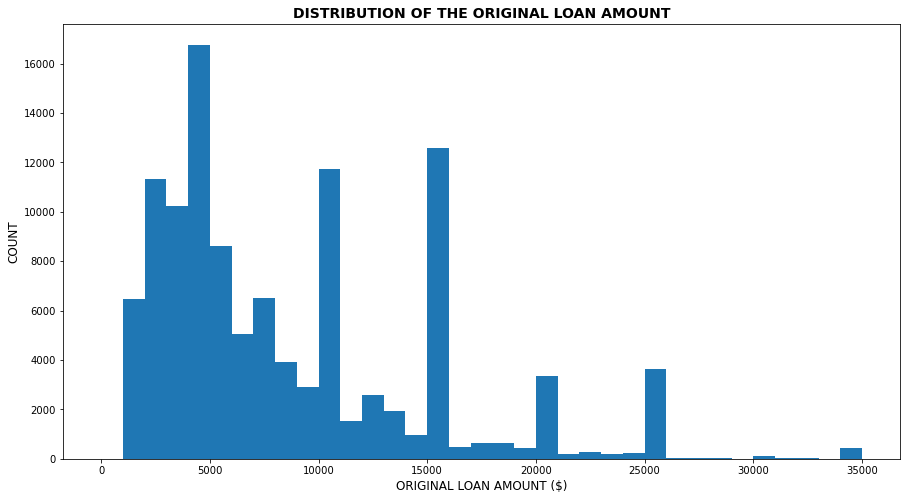

In [48]:
# create an Histogram to show the distribution of the original loan amount
plt.figure(figsize = [15, 8])
bin = np.arange(0, loan['LoanOriginalAmount'].max()+1000, 1000)
color = sb.color_palette()[0]
plt.hist(data = loan, x = 'LoanOriginalAmount', color = color, bins = bin);
plt.title('DISTRIBUTION OF THE ORIGINAL LOAN AMOUNT', fontsize=14, weight=("bold"))
plt.ylabel('COUNT', fontsize=12)
plt.xlabel('ORIGINAL LOAN AMOUNT ($)', fontsize=12);

**Answers**: The original loan amount is evenly distributed from around 1000 dollars to 35000 dollars. We have the highest peak at about 5000 dollars. We also have spikes around 10000 dollars, 15000 dollars, 20000 dollars, and 25000 dollars.

**Q12: What is the distribution of the borrower APR?**

**Define**: Create an histogram showing the distribution of the borrower APR

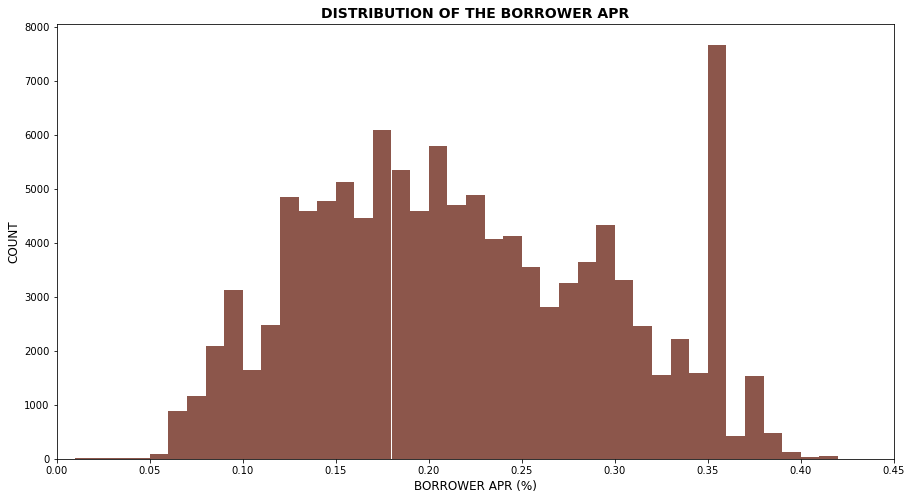

In [49]:
# create an Histogram to show the distribution of the borrower APR
plt.figure(figsize = [15, 8])
bin = np.arange(0, loan['BorrowerAPR'].max()+0.01, 0.01)
color = sb.color_palette()[5]
plt.hist(data = loan, x = 'BorrowerAPR', color = color, bins = bin);
plt.title('DISTRIBUTION OF THE BORROWER APR', fontsize=14, weight=("bold"))
plt.xlim(0, 0.45)
plt.ylabel('COUNT', fontsize=12)
plt.xlabel('BORROWER APR (%)', fontsize=12);

**Answer**: The borrower's APR % rate is distributed just around 0.01 and 0.44. From the plot, we can see that the 'BorrowerAPR' distribution is a multimodal plot. The first peak is around 0.1% with 3000 borrowers, we have another peak around 0.18% with 6000 borrowers. We have a gradual decrease till we get to the highest peak at 0.36% having the largest count of about 8,000.

**Q12: What is the distribution of the borrower Rate?**

**Define**: Create an histogram showing the distribution of the borrower Rate

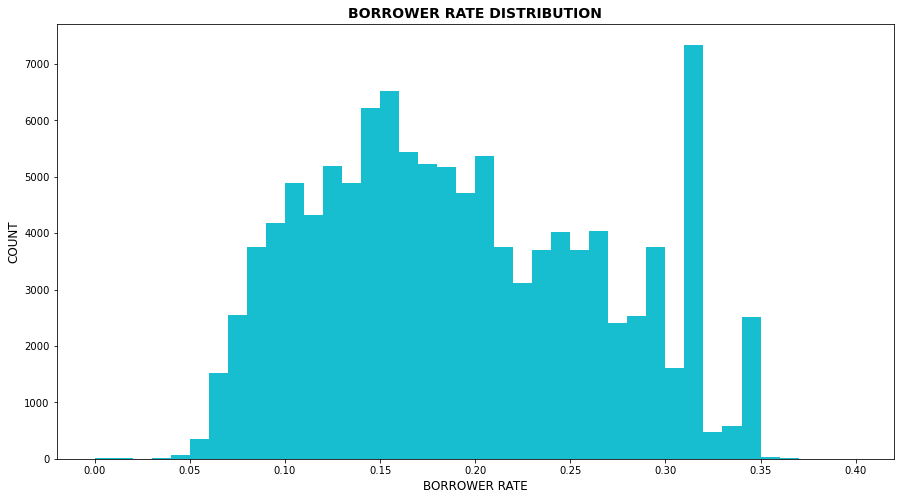

In [50]:
# create an Histogram to show the distribution of the borrower Rate
plt.figure(figsize = [15, 8])
bin = np.arange(0, 0.4+0.01, 0.01)
color = sb.color_palette()[9]
plt.hist(data = loan, x = 'BorrowerRate', color = color, bins = bin);
plt.title('BORROWER RATE DISTRIBUTION', fontsize=14, weight=("bold"))
plt.ylabel('COUNT', fontsize=12)
plt.xlabel('BORROWER RATE', fontsize=12);

**Answer**: The borrower's Rate is distributed just around 0.00 and 0.37. The highest peak is slightly above 0.30 with over 7000 borrower count.

**Q13: What is the distribution of the Stated Monthly Income?**

**Define**: Create an histogram showing the distribution of the stated monthly income

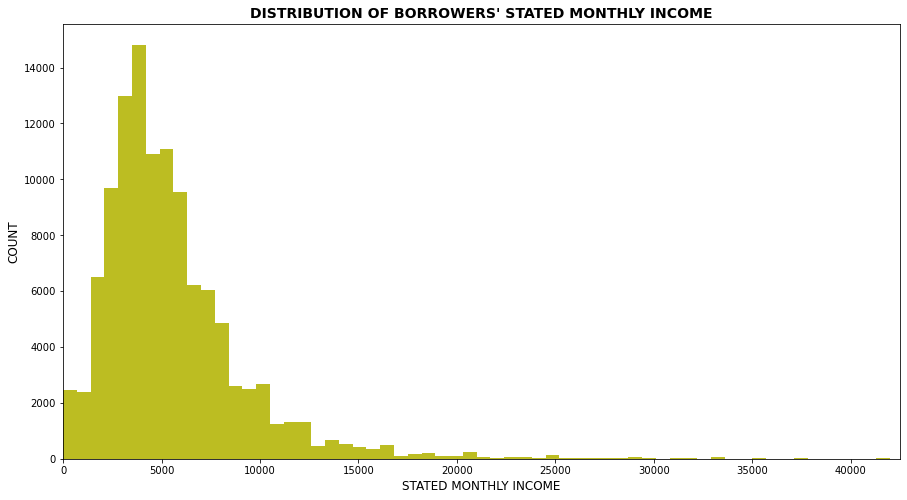

In [51]:
# create an Histogram to show the distribution of the borrower's stated monthly income
plt.figure(figsize = [15, 8])
bin = np.arange(0, loan['StatedMonthlyIncome'].max()+700, 700)
color = sb.color_palette()[8]
plt.hist(data = loan, x = 'StatedMonthlyIncome', color = color, bins = bin);
plt.title("DISTRIBUTION OF BORROWERS' STATED MONTHLY INCOME", fontsize=14, weight=("bold"))
plt.xlim(0, 42500)
plt.ylabel('COUNT', fontsize=12)
plt.xlabel('STATED MONTHLY INCOME', fontsize=12);

**Answer**: The distribution of stated monthly income is severely right skrewed, we have mojority of stated monthly income less than 30,000 dollars

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
I discovered the following after visualizing my variables of interest:
- Majority of the borrowers, approximately 58308 request loans for debt consolidation
- Carlifonia is the state with the highest number of borrowers, they are approximately 14717. North Dakota is the state with the least number of borrowers.
- Majority of the borrowers (almost 70000) are employed 
- Majority of the borrowers (almost 30,000) have other occupations asides the ones provided. Almost 15,000 borrowers are professionals.
- Majority of the borrowers are of the income range 25,000 - 74,999 dollars range
- Majority of the loans have a duration of 36 months
- More Loans (Over 10,000) are taken in Janaury, October and December while April is the month with the least number of loans
- Majority of the loans were taken in 2013 (almost 35,000 loans), no loan was taken in 2005.
- 50.4% of the borrowers are homeowners while 49.6% of the borrowers are not. The distribution plot shows an almost even distribution between borrowers who own a home and those who do not. This implies that home ownership might not have a significant effect on getting a loan from prosper.
- Majority of the borrowers who apply for a loan have only a single prosper loan (almost 16,000). Only 1 borrower has 8 propser loans.
- The original loan amount is evenly distributed from around 1000 dollars to 35000 dollars. We have the highest peak at about 5000 dollars. We also have spikes around 10000 dollars, 15000 dollars, 20000 dollars, and 25000 dollars.
- The borrower's APR % rate is distributed just around 0.01 and 0.44. From the plot, we can see that the 'BorrowerAPR' distribution is a multimodal plot. The first peak is around 0.1% with 3000 borrowers, we have another peak around 0.18% with 6000 borrowers. We have a gradual decrease till we get to the highest peak at 0.36% having the largest count of about 8,000.
- The borrower's Rate is distributed just around 0.00 and 0.37. The highest peak is slightly above 0.30 with over 7000 borrower count.
- The Borrower APR has a similar trend with the Borrower Rate, this was an interesting discovery for me.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> **'BorrowerState' column**: I replaced the two state abbreviations with the actual state names. [Resource from wikipedia](https://simple.wikipedia.org/wiki/List_of_U.S._states_by_traditional_abbreviation). After transforming the data, i was able to get the top 15 borrower sates and the least 5 borrower states. 

> **'LoanOriginationDate' column**: I extracted the months and years of the loans from the loan original date column and was able to easily discover that majority of the loans were collected in 2013 and no loan was taken in 2005 (which was strange). Was proper out of operations in 2005?

>**'Listing_Category' column**: I replaced the numeric representations of the listing categories with their actual names.

## Bivariate Exploration

**Q14: What is the average borrower APR distribution by year?**

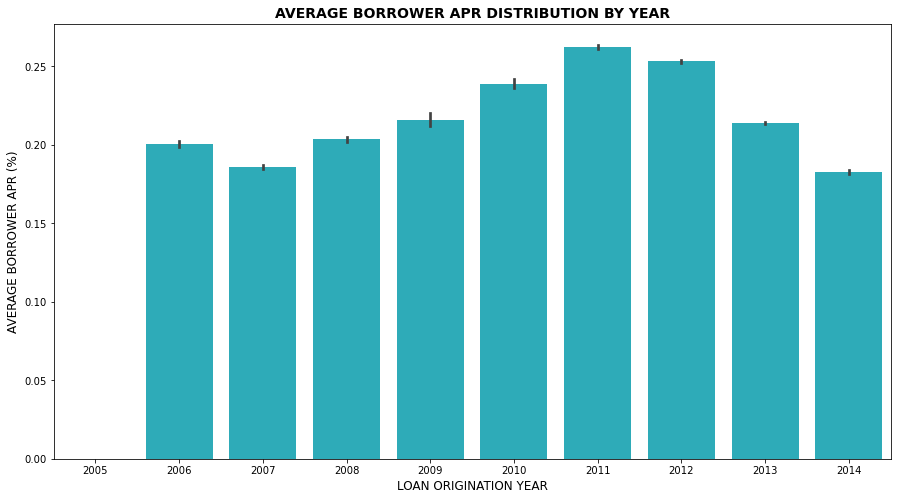

In [52]:
plt.figure(figsize = [15, 8])
color = sb.color_palette()[9]
# creating a bar plot to show the average borrower Apr distribution by year.
sb.barplot(data = loan, x = 'Loan_Year', y = 'BorrowerAPR', color = color)
plt.title('AVERAGE BORROWER APR DISTRIBUTION BY YEAR', fontsize = 14, weight = ('bold'))
plt.xlabel('LOAN ORIGINATION YEAR', fontsize=12)
plt.ylabel('AVERAGE BORROWER APR (%)', fontsize=12);

**Answer:** The distribution barplot above shows that 2006 had 0.2% average borrower APR % with a slight fall to 0.17% in 2007 and a gradual increase till 2011 which was the highest APR % rate of about 0.25%. A steady fall occurred from 2012 (0.23%) to 2014 (about 0.17%)

**Q15: What is the relationship between Income Range and Borrowers who are Homeowners?**

In [53]:
(loan.groupby('IsBorrowerHomeowner')['IncomeRange'].value_counts(normalize = True)) * 100

IsBorrowerHomeowner  IncomeRange   
False                $25,000-49,999    35.397368
                     $50,000-74,999    24.671000
                     $75,000-99,999    10.671461
                     $1-24,999         10.186153
                     Not displayed      9.072070
                     $100,000+          8.324625
                     Not employed       1.062718
                     $0                 0.614605
True                 $50,000-74,999    29.787049
                     $100,000+         21.985803
                     $25,000-49,999    21.237691
                     $75,000-99,999    18.948119
                     Not displayed      4.556526
                     $1-24,999          2.649709
                     $0                 0.476704
                     Not employed       0.358398
Name: IncomeRange, dtype: float64

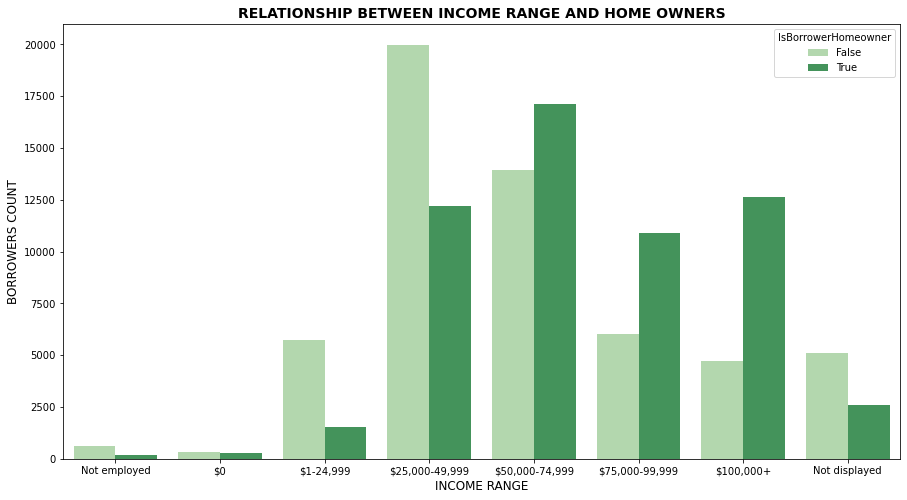

In [54]:
plt.figure(figsize = [15, 8])
order = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed']
sb.countplot(data= loan, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', order = order, palette = 'Greens')
plt.title("RELATIONSHIP BETWEEN INCOME RANGE AND HOME OWNERS", fontsize = 14, weight = ("bold"))
plt.xlabel("INCOME RANGE", fontsize = 12)
plt.ylabel("BORROWERS COUNT", fontsize = 12);

**Answers:** Borrowers with income range from 50,000-100,000+ dollars are mostly homeowners while borrowers with income range from 1,000-49,000+ dollars are do not own a home.

**Q16: What is the relationship between a Borrower's Employment Status and owning a home?**

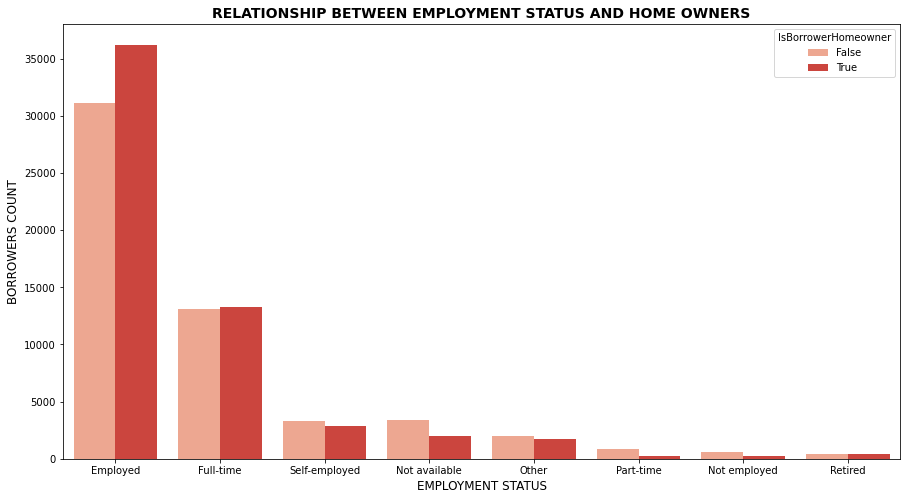

In [55]:
plt.figure(figsize = [15, 8])
order = loan['EmploymentStatus'].value_counts().index
sb.countplot(data= loan, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner', order = order, palette = 'Reds')
plt.title("RELATIONSHIP BETWEEN EMPLOYMENT STATUS AND HOME OWNERS", fontsize = 14, weight = ("bold"))
plt.xlabel("EMPLOYMENT STATUS", fontsize = 12)
plt.ylabel("BORROWERS COUNT", fontsize = 12);

**Answers:** Majority of the employed borrowers are homeowners

**Q17: What is the relationship between employment status and loan term?**

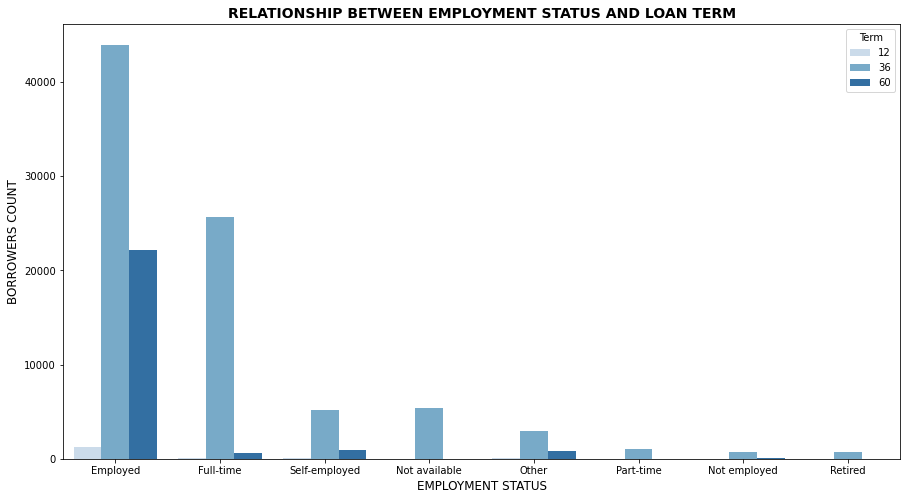

In [56]:
plt.figure(figsize = [15, 8])
order = loan['EmploymentStatus'].value_counts().index
sb.countplot(data= loan, x = 'EmploymentStatus', hue = 'Term', order = order, palette = 'Blues')
plt.title("RELATIONSHIP BETWEEN EMPLOYMENT STATUS AND LOAN TERM", fontsize = 14, weight = ("bold"))
plt.xlabel("EMPLOYMENT STATUS", fontsize = 12)
plt.ylabel("BORROWERS COUNT", fontsize = 12);

**Answers:** Borrowers with full time employment status tend to take loans with term duration of 36months.
Employed borrowers tend to take loans with 36months duration.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Majority of the employed borrowers are homeowners

> 2006 had 0.2% average borrower APR % with a slight fall to 0.17% in 2007 and a gradual increase till 2011 which was the highest APR % rate of about 0.25%. A steady fall occurred from 2012 (0.23%) to 2014 (about 0.17%)

> Borrowers with income range from 50,000-100,000+ dollars are mostly homeowners while borrowers with income range from 1,000-49,000+ dollars are do not own a home.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Borrowers with full time employment status tend to take loans with term duration of 36months.
Employed borrowers tend to take loans with 36months duration. This is interesting to me as i would assume that they have a stable monthly source of income i.e their salary

## Multivariate Exploration

**Q18: What are the correlations between BorrowerAPR','BorrowerRate','LoanOriginalAmount, and 'StatedMonthlyIncome'?**

In [57]:
#store all the numerical variables in a variable called 'num_vars'
num_vars = [ 'BorrowerAPR','BorrowerRate','LoanOriginalAmount','StatedMonthlyIncome']

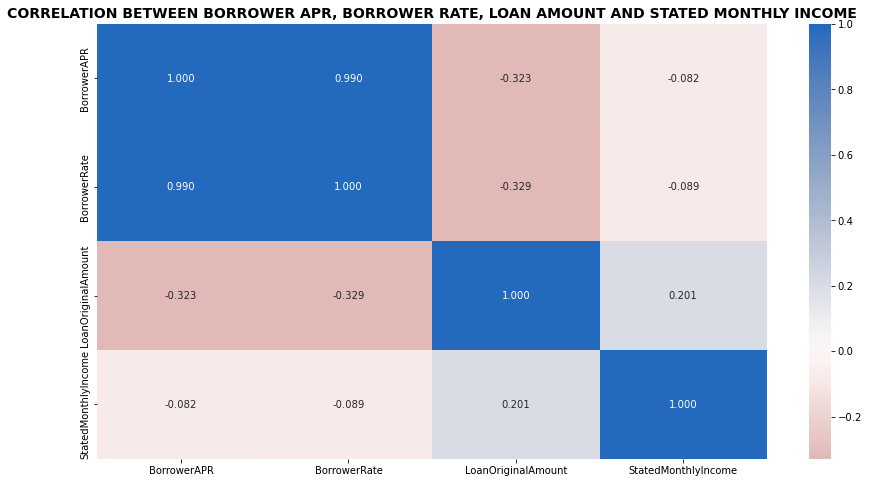

In [58]:
# creat a heatmap plot to show correlation between the numerical variables
plt.figure(figsize = [15, 8])
sb.heatmap(loan[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('CORRELATION BETWEEN BORROWER APR, BORROWER RATE, LOAN AMOUNT AND STATED MONTHLY INCOME', fontsize=14, weight=("bold"));

**Answers:** 
- The correlation coefficient indicates that the borrower rate and borrower APR a have strong positive correlation meaning that they are directly proportional i.e the rise in one vale leads to the rise in the other. 

- We can also see that the Loan original amount has a weak correlation with the borrowers rate and borrower APR. This means that the borrower rate and borrower APR are negatively correlated with the loan original amount. Therefore, the higher the loan amount, the lower the Borrower Rate and Borrower APR. 

- The loan original amount is positively correlated with the stated monthly income. Therefore, the higher the stated monthly income, the higher the original loan amount received by the borrower.

**Q19: How does verifiable income affect the relationship between loan original amount and the income range of borrowers?**

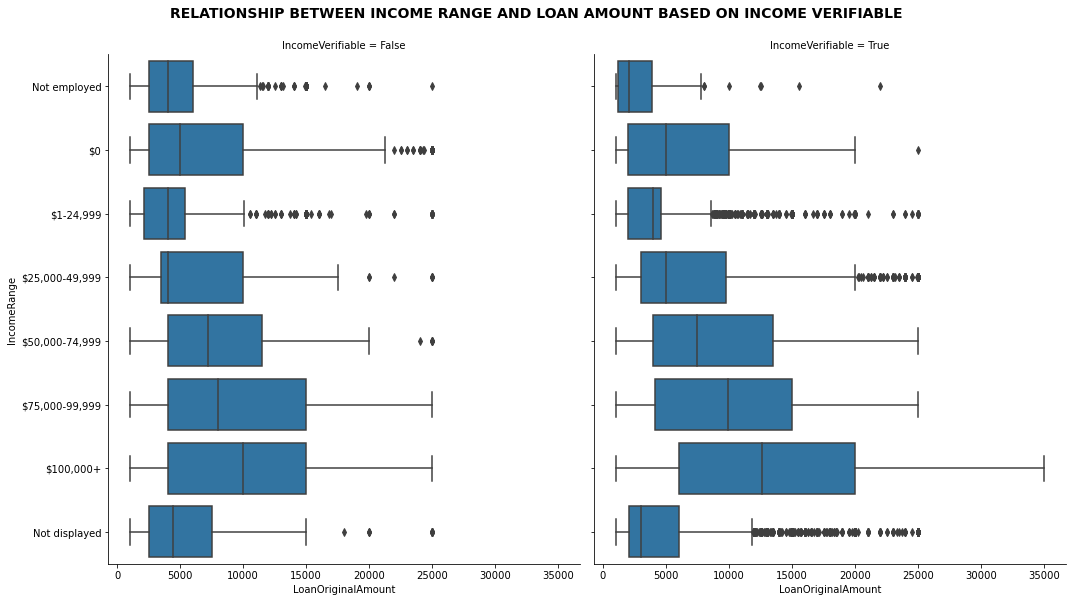

In [59]:
#Create a boxplot to show the effect of verifiable income on the relationship between loan original amount and income range
order = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+','Not displayed']
box = sb.FacetGrid(data = loan, col = 'IncomeVerifiable', height = 5)
box.fig.set_size_inches(15,8)
box.map(sb.boxplot, 'LoanOriginalAmount', 'IncomeRange', order = order)
plt.suptitle("RELATIONSHIP BETWEEN INCOME RANGE AND LOAN AMOUNT BASED ON INCOME VERIFIABLE", fontsize = 14, weight = ("bold"), y = 1.04);


**Answers:** Borrowers who earn 100,000+ dollars and have verified their income tend to get larger loan original amount than those whose income are not verifiable. The borrowers with verified incomes seem to get higher loan amounts.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Verifiable income has an effect on the original loan amount disbursed to a borrower. Borrowers who earn 100,000+ dollars and have verified their income tend to get larger loan original amount than those whose income are not verifiable

> The borrower rate and borrower APR a have strong positive correlation meaning that they are directly proportional i.e the rise in one vale leads to the rise in the other.

### Were there any interesting or surprising interactions between features?

> The Loan original amount has a weak correlation with the borrowers rate and borrower APR.

> The loan original amount is positively correlated with the stated monthly income. Therefore, the higher the stated monthly income, the higher the original loan amount received by the borrower.

## Conclusions

Out of 81 loan features, I selected 21 columns and stored in a dataframe called 'loan' for my analysis including 5 major columns of interest which are:

**Features related to the Borrower**
- BorrowerAPR: The Borrower's Annual Percentage Rate (APR) for the loan.
- BorrowerRate: The Borrower's interest rate for this loan.

**Features related to the Loan disbursed to the borrower**
- LoanOriginalAmount: The origination amount of the loan.
- LoanOriginationDate: The date the loan was originated.
- Term: The length of the loan expressed in months.

The loan dataframe was wrangled to achieve proper data visulization.

A key insight during the univariate analysis was understanding the fact that home ownership distribution was almost evenly distributed, meaning home ownership did not have a significant effect on getting a loan from prosper. After researching the two letter state abbrevations on wikipedia [Resource from wikipedia](https://simple.wikipedia.org/wiki/List_of_U.S._states_by_traditional_abbreviation) and transforming the 'BorrowerState' column, it was interesting to know that Carlifonia is the state with the highest number of borrowers and North Dakota is the state with the least number of borrowers. I also discovered that majority of the borrowers (almost 70000) are employed and they have an income range of 25,000 - 74,999 dollars. Another insightful information was the fact that majority of the loans were collected in 2013 and no loan was taken in 2005, this was very strange to me. Was Prosper out of operations in 2005? I think this is an important insight to investigate further.

Investigating further during my bivariate analysis, I discovered that Borrowers with full time employment status tend to take loans with term duration of 36months. Employed borrowers tend to take loans with 36months duration. This is interesting to me as i would assume that they have a stable monthly source of income i.e their salary. I also discovered that majority of the employed borrowers are homeowners

The multivariate analysis reavealed that verifiable income has an effect on the original loan amount disbursed to a borrower. Borrowers who earn 100,000+ dollars and have verified their income tend to get larger loan original amount than those whose income are not verifiable. The borrower rate and borrower APR a have strong positive correlation meaning that they are directly proportional i.e the rise in one vale leads to the rise in the other. Also, the Loan original amount has a weak correlation with the borrowers rate and borrower APR.

Generally, the borrower's APR and having verifiable income seem to be crucial when giving out loans to borrowers.